In [1]:
#Our LR model written in LinearRegressionModel.py 
from LinearRegressionModel import linear_regression_model  

import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

## EDA & Data Preparation to feed the dataset into written model

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston['data'].shape

(506, 13)

In [7]:
bost = pd.DataFrame(boston['data'])

In [8]:
bost.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bost.columns = boston['feature_names']

In [10]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
#Normalize input matrix so that data lies in the range of -1 to +1
X = (bost - bost.mean())/(bost.max() -bost.min())

In [13]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-3.208896e-18,1.148072e-16,-6.812595e-16,-1.189760e-16,6.223338e-16,-1.521044e-15,-3.491388e-16,1.206490e-16,6.406821e-17,1.933017e-16,-2.300312e-15,1.881620e-15,-1.082797e-16
std,9.667929e-02,2.332245e-01,2.514792e-01,2.539940e-01,2.384314e-01,1.346268e-01,2.898956e-01,1.914822e-01,3.785765e-01,3.216357e-01,2.303134e-01,2.302054e-01,1.970492e-01
min,-4.054410e-02,-1.136364e-01,-3.913775e-01,-6.916996e-02,-3.491668e-01,-5.218690e-01,-6.763636e-01,-2.423813e-01,-3.717134e-01,-4.222083e-01,-6.229291e-01,-8.985678e-01,-3.014090e-01
25%,-3.969297e-02,-1.136364e-01,-2.179904e-01,-6.916996e-02,-2.174795e-01,-7.647718e-02,-2.425325e-01,-1.541223e-01,-2.412786e-01,-2.466358e-01,-1.122908e-01,4.716191e-02,-1.573693e-01
50%,-3.773202e-02,-1.136364e-01,-5.303441e-02,-6.916996e-02,-3.435197e-02,-1.458793e-02,9.191657e-02,-5.343258e-02,-1.978003e-01,-1.493075e-01,6.324111e-02,8.766445e-02,-3.568055e-02
75%,7.143872e-04,1.136364e-02,2.552500e-01,-6.916996e-02,1.426028e-01,6.492922e-02,2.626169e-01,1.267068e-01,6.282866e-01,4.919138e-01,1.855815e-01,9.973011e-02,1.187069e-01
max,9.594559e-01,8.863636e-01,6.086225e-01,9.308300e-01,6.508332e-01,4.781310e-01,3.236364e-01,7.576187e-01,6.282866e-01,5.777917e-01,3.770709e-01,1.014322e-01,6.985910e-01


In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [15]:
y = boston['target']

In [16]:
y.shape

(506,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [19]:
X_train.shape

(339, 13)

In [20]:
#our model needs X_training of dimension (number_features x number_training_examples)
X_train = X_train.T

In [21]:
X_train.shape

(13, 339)

In [22]:
X_train

,435,88,365,242,461,129,12,419,152,79,...,228,8,73,400,118,486,189,495,206,355
CRIM,0.084825,-0.039979,0.010592,-0.039459,0.000895,-0.030710,-0.039561,0.092152,-0.027953,-0.039672,...,-0.037264,-0.038241,-0.038419,0.240897,-0.039147,0.023359,-0.039674,-0.038603,-0.038033,-0.039417
ZN,-0.113636,-0.113636,-0.113636,0.186364,-0.113636,-0.113636,0.011364,-0.113636,-0.113636,-0.113636,...,-0.113636,0.011364,-0.113636,-0.113636,-0.113636,-0.113636,0.336364,-0.113636,-0.113636,0.686364
INDUS,0.255250,-0.283240,0.255250,-0.227521,0.255250,0.394180,-0.119750,0.255250,0.309502,0.062068,...,-0.180967,-0.119750,-0.011979,0.255250,-0.041304,0.255250,-0.282140,-0.053034,-0.020043,-0.338225
CHAS,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,0.930830,-0.069170,...,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170
NOX,0.381286,-0.135175,0.336018,-0.260689,0.325730,0.142603,-0.063159,0.336018,0.650833,-0.242171,...,-0.104311,-0.063159,-0.291554,0.284578,-0.015833,0.058241,-0.242171,0.062356,-0.135175,-0.291554
RM,0.065983,0.138411,-0.521869,0.014057,0.017506,-0.124092,-0.075807,0.103347,-0.243846,-0.078681,...,0.268512,-0.125241,-0.007594,-0.057029,-0.079064,-0.032695,0.172517,-0.117769,0.007926,-0.066801
AGE,0.268024,0.182545,0.199023,-0.161430,0.204172,0.269054,-0.304582,0.081618,0.200053,-0.329299,...,-0.531152,0.323636,-0.642378,0.323636,0.046602,0.115603,-0.305612,-0.409628,-0.165550,-0.505406
DIS,-0.151892,-0.033950,-0.198405,0.294670,-0.111663,-0.165059,0.150575,-0.181964,-0.198678,0.064342,...,-0.038187,0.207973,0.135698,-0.200624,-0.119810,-0.022656,0.070170,-0.090611,0.050910,0.617507
RAD,0.628287,-0.328235,0.628287,-0.154322,0.628287,-0.241279,-0.197800,0.628287,-0.197800,-0.197800,...,-0.067366,-0.197800,-0.241279,0.628287,-0.154322,0.628287,-0.197800,-0.154322,-0.241279,-0.241279
TAX,0.491914,-0.263811,0.491914,-0.206559,0.491914,0.054891,-0.185567,0.491914,-0.009995,-0.019537,...,-0.193201,-0.185567,-0.197017,0.491914,0.045349,0.491914,-0.019537,-0.032895,-0.250453,-0.141674


In [23]:
y_train.shape

(339,)

In [24]:
# we need y_train of dimension 1xm_train where m_train = number of training examples
y_train = np.array([y_train])

In [25]:
y_train.shape

(1, 339)

In [26]:
#our model needs X_validation of dimension (number_features x number_validation_examples)
X_val = X_val.T

In [27]:
X_val.shape

(13, 167)

In [28]:
# we need y_val of dimension 1xm_val where m_val = number of training examples
y_val = np.array([y_val])

In [29]:
y_val.shape

(1, 167)

In [30]:
X_train

,435,88,365,242,461,129,12,419,152,79,...,228,8,73,400,118,486,189,495,206,355
CRIM,0.084825,-0.039979,0.010592,-0.039459,0.000895,-0.030710,-0.039561,0.092152,-0.027953,-0.039672,...,-0.037264,-0.038241,-0.038419,0.240897,-0.039147,0.023359,-0.039674,-0.038603,-0.038033,-0.039417
ZN,-0.113636,-0.113636,-0.113636,0.186364,-0.113636,-0.113636,0.011364,-0.113636,-0.113636,-0.113636,...,-0.113636,0.011364,-0.113636,-0.113636,-0.113636,-0.113636,0.336364,-0.113636,-0.113636,0.686364
INDUS,0.255250,-0.283240,0.255250,-0.227521,0.255250,0.394180,-0.119750,0.255250,0.309502,0.062068,...,-0.180967,-0.119750,-0.011979,0.255250,-0.041304,0.255250,-0.282140,-0.053034,-0.020043,-0.338225
CHAS,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,0.930830,-0.069170,...,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170,-0.069170
NOX,0.381286,-0.135175,0.336018,-0.260689,0.325730,0.142603,-0.063159,0.336018,0.650833,-0.242171,...,-0.104311,-0.063159,-0.291554,0.284578,-0.015833,0.058241,-0.242171,0.062356,-0.135175,-0.291554
RM,0.065983,0.138411,-0.521869,0.014057,0.017506,-0.124092,-0.075807,0.103347,-0.243846,-0.078681,...,0.268512,-0.125241,-0.007594,-0.057029,-0.079064,-0.032695,0.172517,-0.117769,0.007926,-0.066801
AGE,0.268024,0.182545,0.199023,-0.161430,0.204172,0.269054,-0.304582,0.081618,0.200053,-0.329299,...,-0.531152,0.323636,-0.642378,0.323636,0.046602,0.115603,-0.305612,-0.409628,-0.165550,-0.505406
DIS,-0.151892,-0.033950,-0.198405,0.294670,-0.111663,-0.165059,0.150575,-0.181964,-0.198678,0.064342,...,-0.038187,0.207973,0.135698,-0.200624,-0.119810,-0.022656,0.070170,-0.090611,0.050910,0.617507
RAD,0.628287,-0.328235,0.628287,-0.154322,0.628287,-0.241279,-0.197800,0.628287,-0.197800,-0.197800,...,-0.067366,-0.197800,-0.241279,0.628287,-0.154322,0.628287,-0.197800,-0.154322,-0.241279,-0.241279
TAX,0.491914,-0.263811,0.491914,-0.206559,0.491914,0.054891,-0.185567,0.491914,-0.009995,-0.019537,...,-0.193201,-0.185567,-0.197017,0.491914,0.045349,0.491914,-0.019537,-0.032895,-0.250453,-0.141674


## Feeding prepared dataset in our Linear Regression Model 

Epochs 1/500: 
Training cost 295.76628961844835|Validation cost 135.01196703457362
Training MAE 22.529026234948876|Validation MAE 13.582347972694881
Epochs 2/500: 
Training cost 127.7798910358148|Validation cost 73.07740190991572
Training MAE 13.572054643003636|Validation MAE 8.628948122089996
Epochs 3/500: 
Training cost 65.66038239510812|Validation cost 49.43322921034916
Training MAE 8.630757980439347|Validation MAE 6.351606479551205
Epochs 4/500: 
Training cost 42.05429225868819|Validation cost 39.90261381076111
Training MAE 6.182344136009521|Validation MAE 5.5454493870958
Epochs 5/500: 
Training cost 32.6042356375534|Validation cost 35.69015261508335
Training MAE 5.215291259187475|Validation MAE 5.313272990285027
Epochs 6/500: 
Training cost 28.459384227006037|Validation cost 33.55976900477639
Training MAE 4.941493288376403|Validation MAE 5.284080511947825
Epochs 7/500: 
Training cost 26.37407790199285|Validation cost 32.29598561684301
Training MAE 4.8863014519892065|Validation MAE

Epochs 187/500: 
Training cost 10.46087026847895|Validation cost 14.905696775095883
Training MAE 3.1911041121923645|Validation MAE 3.5313432171954116
Epochs 188/500: 
Training cost 10.455026364375096|Validation cost 14.897270757947869
Training MAE 3.190543051559662|Validation MAE 3.530254789776037
Epochs 189/500: 
Training cost 10.449268002279817|Validation cost 14.88895808886929
Training MAE 3.189984004960612|Validation MAE 3.529170503826758
Epochs 190/500: 
Training cost 10.443593462435588|Validation cost 14.88075665940715
Training MAE 3.189427813487731|Validation MAE 3.5280903743186296
Epochs 191/500: 
Training cost 10.438001065130255|Validation cost 14.87266440906547
Training MAE 3.1889150019575903|Validation MAE 3.527014415334495
Epochs 192/500: 
Training cost 10.432489169667681|Validation cost 14.864679324082347
Training MAE 3.188403592262164|Validation MAE 3.5259426400899025
Epochs 193/500: 
Training cost 10.42705617336751|Validation cost 14.856799436241257
Training MAE 3.187893

Epochs 361/500: 
Training cost 10.016515687925402|Validation cost 14.250848893421884
Training MAE 3.149590786454552|Validation MAE 3.4390423500429876
Epochs 362/500: 
Training cost 10.015376593670458|Validation cost 14.24931184831244
Training MAE 3.14947152165842|Validation MAE 3.4388493052340805
Epochs 363/500: 
Training cost 10.014244298755028|Validation cost 14.247787071383707
Training MAE 3.1493521916950185|Validation MAE 3.4386571680051197
Epochs 364/500: 
Training cost 10.013118740990333|Validation cost 14.24627446065006
Training MAE 3.1492328012976563|Validation MAE 3.438465937577362
Epochs 365/500: 
Training cost 10.011999859069421|Validation cost 14.24477391531365
Training MAE 3.1491133551274215|Validation MAE 3.43827561310997
Epochs 366/500: 
Training cost 10.010887592551015|Validation cost 14.243285335744893
Training MAE 3.1489938577741707|Validation MAE 3.438086193701404
Epochs 367/500: 
Training cost 10.00978188184367|Validation cost 14.241808623463378
Training MAE 3.14887

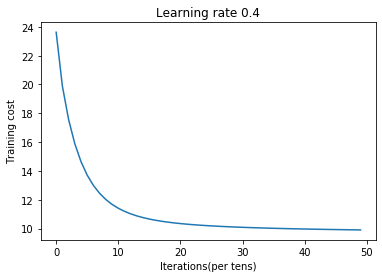

In [32]:
linear_regression_model(X_train,y_train,X_val,y_val,0.4,500)

## Let's compare accuracy of our model with LR model from sklearn

In [33]:
from sklearn import linear_model

In [34]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train.T, y_train.T)
predictions = linear_regression.predict(X_val.T)

In [35]:
predictions.shape

(167, 1)

In [36]:
MAE_val_with_sklearn = (1/y_val.shape[1])*np.sum(np.abs(predictions-y_val.T))

In [37]:
MAE_val_with_sklearn

3.4550349322483527